In [1]:
import os
import cv2
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights

Load the pretrained model

In [2]:
model = fasterrcnn_resnet50_fpn_v2(weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

Function to load and transform the image

In [3]:
def process_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transform = transforms.Compose([transforms.ToTensor()])
    image = transform(image)
    return image

Detect objects in the image

In [9]:
def detect_birds(image, threshold=0.5):
    with torch.no_grad():
        prediction = model([image])
    # Filter predictions based on the threshold
    pred_boxes = prediction[0]['boxes'][prediction[0]['scores'] > threshold]
    pred_labels = prediction[0]['labels'][prediction[0]['scores'] > threshold]
    pred_scores = prediction[0]['scores'][prediction[0]['scores'] > threshold]
    return pred_boxes, pred_labels, pred_scores

Crop image and save bird images (including plot of the bounding box)

In [13]:
def crop_and_draw_birds(original_image, boxes, labels, ax, save_dir):
    found_birds = False
    for i, (box, label) in enumerate(zip(boxes, labels)):
        if label == 16:  # Class label for birds in COCO
            found_birds = True
            x1, y1, x2, y2 = map(int, box)
            crop = original_image[y1:y2, x1:x2]
            cv2.imwrite(f'{save_dir}/bird_{i}.jpg',
                        cv2.cvtColor(crop, cv2.COLOR_RGB2BGR))

            # Draw rectangle on the original image
            cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 3)

    if not found_birds:
        print("No birds detected.")
    else:
        ax.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

Load and process the image

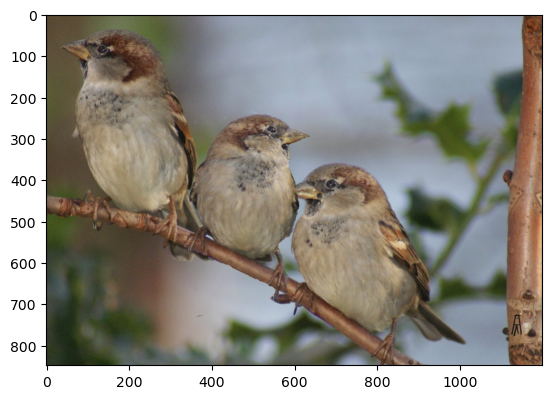

In [17]:
current_directory = os.getcwd() # Get Current Working Directory
image_path = os.path.join(current_directory, 'test-data', 'spatzen.jpg')
image = process_image(image_path)
# preview image
plt.imshow(image.permute(1, 2, 0))
plt.show()

Detect birds

In [18]:
# Lower the detection threshold
threshold = 0.3

# Detect birds
boxes, labels, scores = detect_birds(image, threshold=threshold)

# Print predictions
print("Boxes:", boxes)
print("Labels:", labels)
print("Scores:", scores)

Boxes: tensor([[ 594.2397,  359.9056, 1020.0218,  844.7124],
        [  31.2629,   32.0041,  379.4349,  577.5744],
        [ 351.9658,  242.1344,  639.2206,  674.3648]])
Labels: tensor([16, 16, 16])
Scores: tensor([0.9995, 0.9986, 0.9953])


Create a matplotlib figure and crop the birds (draw bounding boxes on original image)

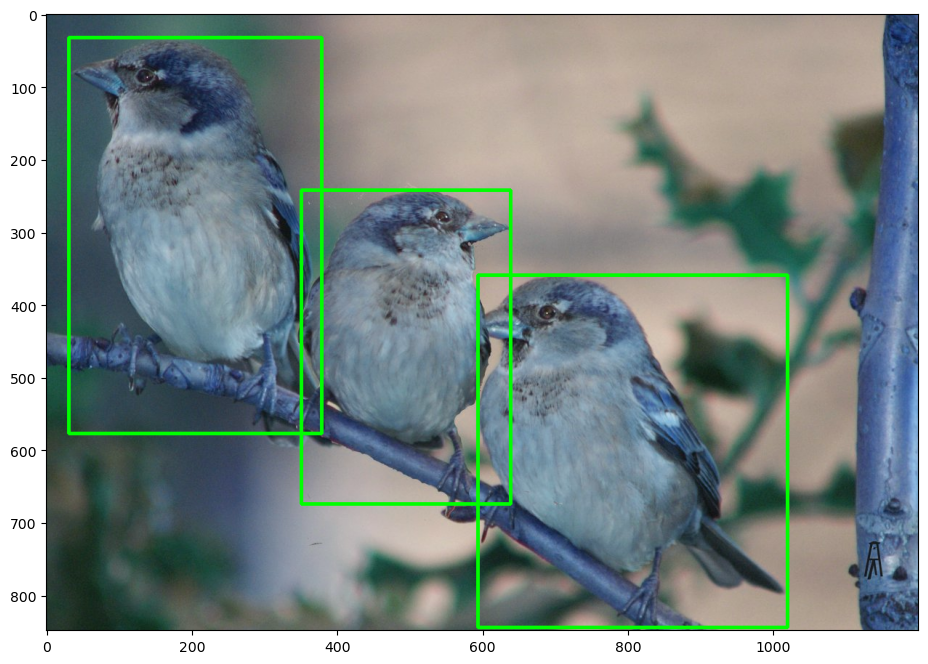

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
save_dir = os.path.join(current_directory, 'cropped-images')
crop_and_draw_birds(original_image, boxes, labels, ax, save_dir)

plt.show()

In [ ]:
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
crop_and_draw_birds(original_image, predictions, ax)

Show the results

In [ ]:
plt.show()